# Do Neural Networks overfit?

This brief post is exploring overfitting neural networks. It comes from reading the paper:

Towards Understanding Generalization of Deep Learning: Perspective of Loss Landscapes
https://arxiv.org/pdf/1706.10239.pdf

We show that fitting a hugely overparameterised model to some linear regression data works absolutely fine... The results are quite cool so I thought I would double check.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")
rng = np.random.RandomState(0)
tf.random.set_seed(0)

Lets generate some linear regression data. We only generate **100 data points**. This is simply a straight line with Gaussian noise - a problem linear regression is optimal for.

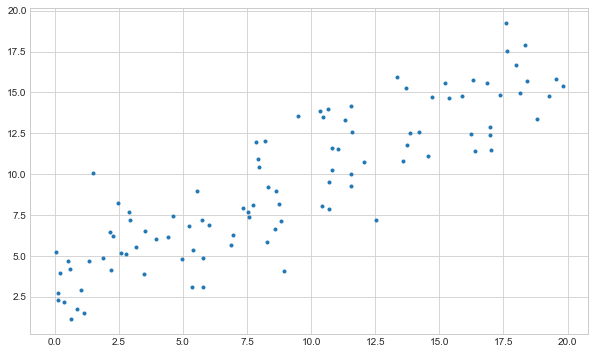

In [2]:
x = np.random.uniform(0, 20, size=(100))
true_data = lambda x: 3 + 0.7 * x
y = true_data(x) + np.random.normal(scale=2.0, size=(100))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, ".")
plt.show()

Lets try fit this with a neural network. The network is deliberating over complex with over **40,000 parameters** to tune and the relu activation function for non-linearity.

In [3]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            100, input_shape=(1,), activation=tf.keras.activations.relu
        ),
        tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1),
    ]
)
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.mse
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 40,701
Trainable params: 40,701
Non-trainable params: 0
____________________________________________________

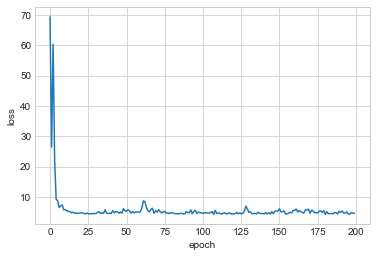

In [4]:
history = model.fit(x, y, epochs=200, verbose=False)
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

If we make predictions from the overly complex neural network we would expect some drastically overfit results...

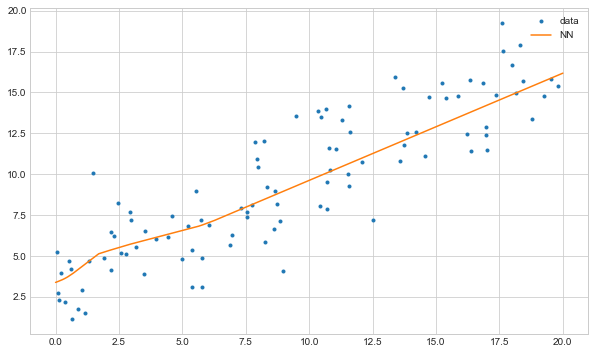

In [5]:
x_eval = np.linspace(0, 20, 1000)
y_eval = model.predict(x_eval)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, ".", label="data")
ax.plot(x_eval, y_eval, label="NN")
plt.legend()
plt.show()

The results are pretty reasonable! There isnt a crazy line that passing through all our points.

We can compare this to the results from linear regression. For laziness, we do this in tensorflow using a single layer linear network:

In [6]:
model_linear = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, input_shape=(1,)),
    ]
)

model_linear.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.05), loss=tf.keras.losses.mse
)
model_linear.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


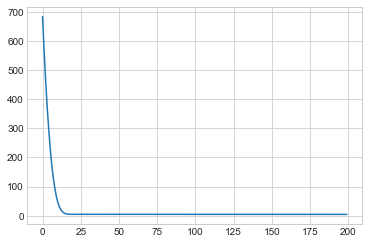

In [7]:
history_linear = model_linear.fit(x, y, epochs=200, verbose=False)
plt.plot(history_linear.history["loss"])
y_linear_eval = model_linear.predict(x_eval)

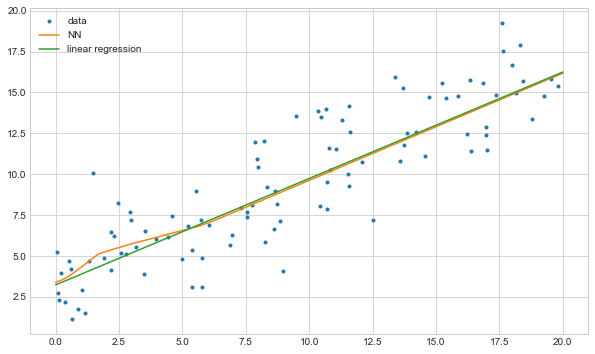

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, ".", label="data")
ax.plot(x_eval, y_eval, label="NN")
ax.plot(x_eval, y_linear_eval, label="linear regression")
plt.legend()
plt.show()

The two models look pretty similar. For more details on why this is the case - please refer to the paper in the introduction.